In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('mission7.csv')
data.head(10)

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
0,Clay,11,10,30,6.1,Lily,Yes
1,Sandy,11,28,26,7.0,Fern,No
2,Clay,6,9,25,5.7,Cactus,Yes
3,Clay,4,24,17,5.5,Fern,Yes
4,Sandy,11,6,20,7.1,Rose,No
5,Sandy,6,10,21,6.0,Cactus,No
6,Clay,6,26,20,5.7,Lily,Yes
7,Loamy,4,15,28,6.5,Cactus,Yes
8,Clay,8,20,28,5.6,Cactus,No
9,Clay,10,20,20,7.7,Cactus,No


In [ ]:
for i in data.columns:
  print(data[i].unique())
  print(i)
  print("--------------------------------")

['Clay' 'Sandy' 'Loamy']
Soil Type
--------------------------------
[11  6  4  8 10 12  5  9  7]
Sunlight (hours/day)
--------------------------------
[10 28  9 24  6 26 15 20  5 13  7  8 23 30 11 12 22 29 27 14 21 16 18 25]
Water Supply (liters/week)
--------------------------------
[30 26 25 17 20 21 28 27 22 16 19 15 29 18 23 24]
Temperature (Â°C)
--------------------------------
[6.1 7.  5.7 5.5 7.1 6.  6.5 5.6 7.7 6.9 6.6 7.2 6.3 5.9 8.  7.6 6.8 6.2
 7.9 5.8 7.3 7.4 7.8 6.4 7.5 6.7]
pH Level
--------------------------------
['Lily' 'Fern' 'Cactus' 'Rose' 'Oak']
Plant Species
--------------------------------
['Yes' 'No']
Thrives
--------------------------------


In [ ]:
data.isnull().sum()

,0
Soil Type,0
Sunlight (hours/day),0
Water Supply (liters/week),0
Temperature (Â°C),0
pH Level,0
Plant Species,0
Thrives,0


In [ ]:
data.duplicated().sum()

900

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Soil Type                   1000 non-null   object 
 1   Sunlight (hours/day)        1000 non-null   int64  
 2   Water Supply (liters/week)  1000 non-null   int64  
 3   Temperature (Â°C)           1000 non-null   int64  
 4   pH Level                    1000 non-null   float64
 5   Plant Species               1000 non-null   object 
 6   Thrives                     1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [ ]:
data.columns

Index(['Soil Type', 'Sunlight (hours/day)', 'Water Supply (liters/week)',
       'Temperature (Â°C)', 'pH Level', 'Plant Species', 'Thrives'],
      dtype='object')

In [ ]:
data['Thrives']=data['Thrives'].map({'Yes':1,'No':0})

In [ ]:
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [ ]:
Le={}
encode=['Soil Type','Plant Species']
for col in encode:
  Le[col]=LabelEncoder()
  data[col]=Le[col].fit_transform(data[col])
print(Le)

{'Soil Type': LabelEncoder(), 'Plant Species': LabelEncoder()}


In [ ]:
scale=['Sunlight (hours/day)', 'Water Supply (liters/week)', 'Temperature (Â°C)', 'pH Level']
Sc=StandardScaler()
data[scale]=Sc.fit_transform(data[scale])
data.head(10)

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
0,0,1.146992,-0.826136,1.463304,-0.683192,2,1
1,2,1.146992,1.403317,0.654178,0.480238,1,0
2,0,-0.710184,-0.949995,0.451897,-1.200272,0,1
3,0,-1.453055,0.907883,-1.166355,-1.458812,1,1
4,2,1.146992,-1.321570,-0.559511,0.609508,4,0
5,2,-0.710184,-0.826136,-0.357229,-0.812462,0,0
6,0,-0.710184,1.155600,-0.559511,-1.200272,2,1
7,1,-1.453055,-0.206844,1.058741,-0.166112,0,1
8,0,0.032686,0.412449,1.058741,-1.329542,0,0
9,0,0.775557,0.412449,-0.559511,1.385128,0,0


In [ ]:
data.describe()

,Soil Type,Sunlight (hours/day),Water Supply (liters/week),Temperature (Â°C),pH Level,Plant Species,Thrives
count,1000.00000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.00000
mean,1.03200,3.730349e-17,-2.202682e-16,3.517187e-16,1.563194e-16,2.000000,0.50000
std,0.79976,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.384889,0.50025
min,0.00000,-1.453055e+00,-1.445429e+00,-1.570918e+00,-1.458812e+00,0.000000,0.00000
25%,0.00000,-7.101844e-01,-9.499947e-01,-7.617920e-01,-8.124620e-01,1.000000,0.00000
50%,1.00000,3.268631e-02,1.647318e-01,4.733387e-02,-3.684195e-02,2.000000,0.50000
75%,2.00000,7.755570e-01,9.078828e-01,8.564598e-01,8.680481e-01,3.000000,1.00000
max,2.00000,1.518428e+00,1.651034e+00,1.463304e+00,1.772938e+00,4.000000,1.00000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

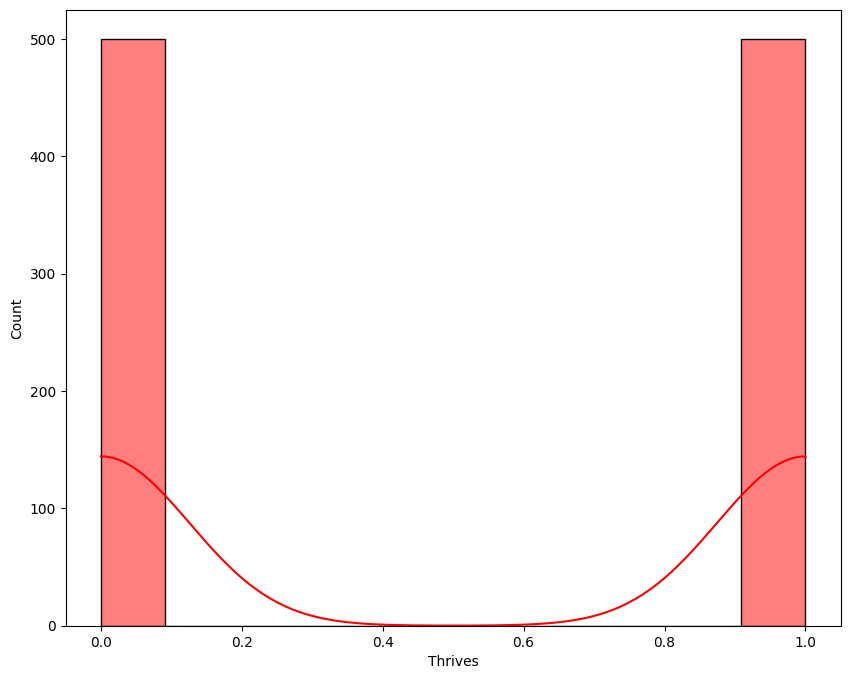

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data['Thrives'],kde=True,color='Red')
plt.title='Thrives'
plt.xlabel='Thrives'
plt.ylabel='Frequancy'

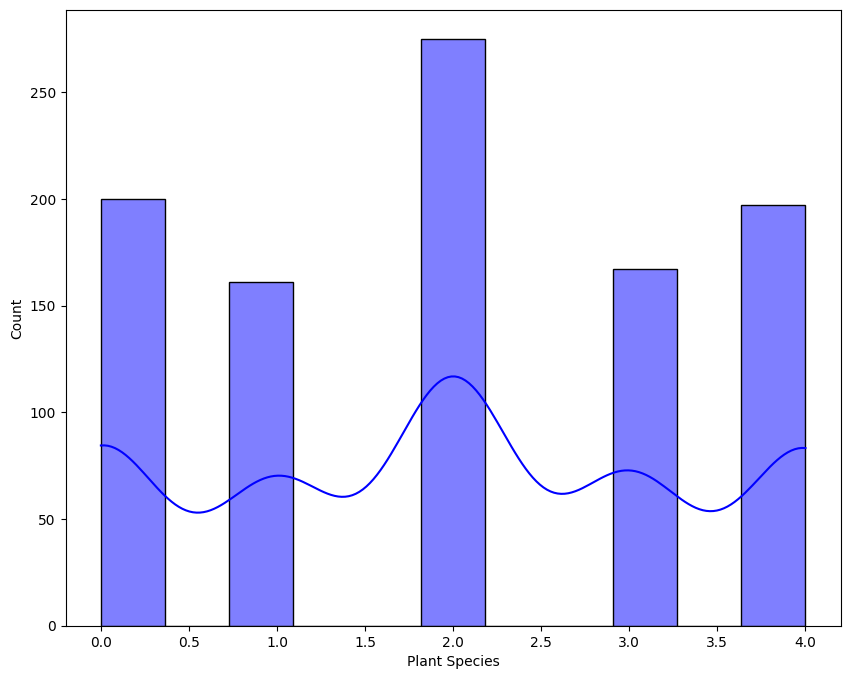

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data['Plant Species'],kde=True,color='Blue')
plt.title='Plant Species'
plt.xlabel='Plant Species'
plt.ylabel='Frequancy'

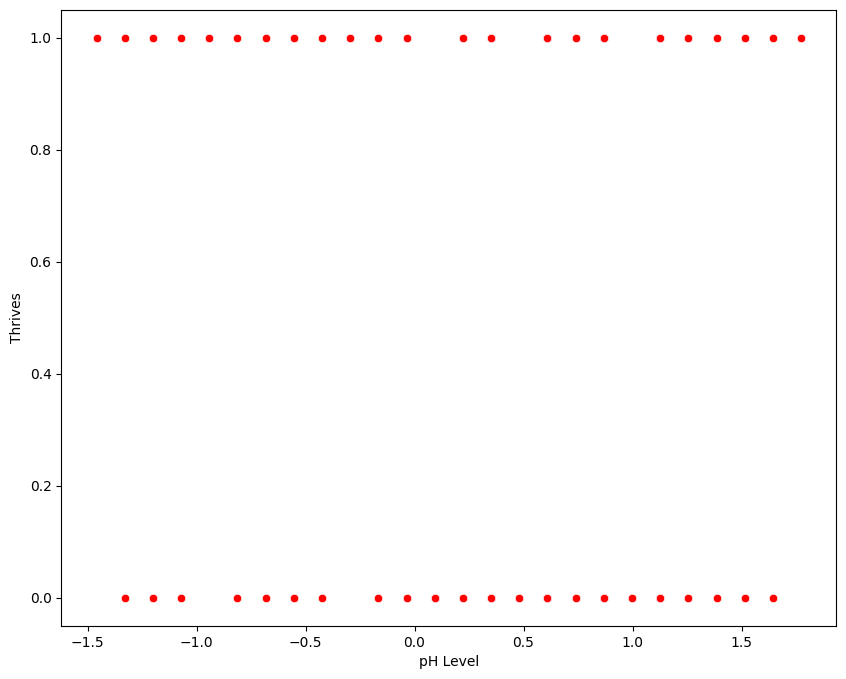

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['pH Level'],y=data['Thrives'],color='Red')
plt.title='Thrives'
plt.xlabel='pH Level'
plt.ylabel='Thrives'

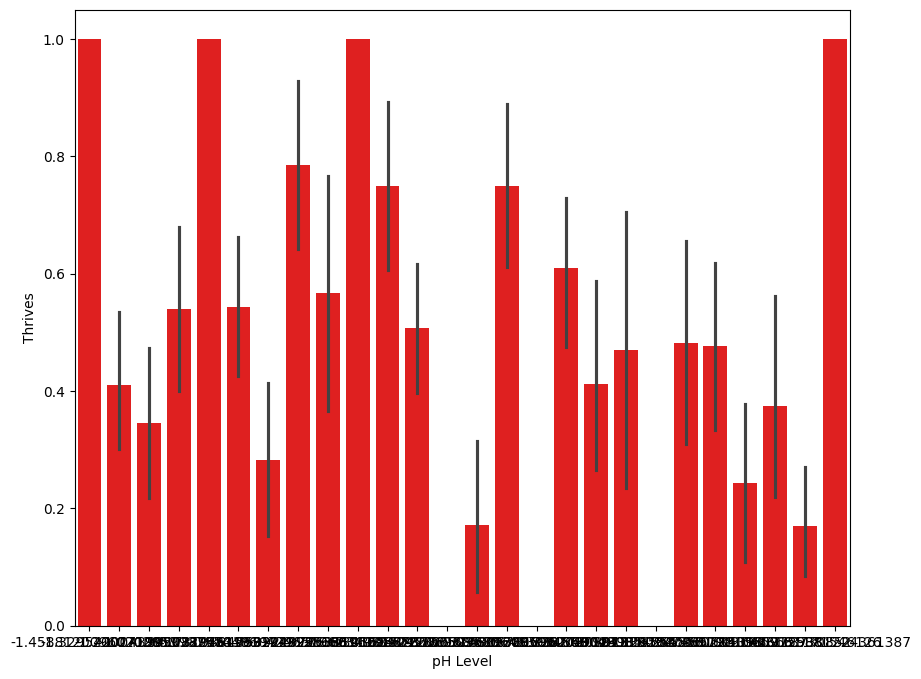

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['pH Level'],y=data['Thrives'],color='Red')
plt.title='Thrives'
plt.xlabel='pH Level'
plt.ylabel='Thrives'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop('Thrives',axis=1)
y=data['Thrives']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
LO=LogisticRegression()
DTC=DecisionTreeClassifier()

In [ ]:
LO.fit(x_train,y_train)
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_LO=LO.predict(x_test)
y_pred_DTC=DTC.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
Acc = accuracy_score ( y_test , y_pred_LO )
CM = confusion_matrix ( y_test , y_pred_LO )
CR = classification_report ( y_test , y_pred_LO )

In [ ]:
print(Acc)
print(CM)
print(CR)

0.695
[[64 33]
 [28 75]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        97
           1       0.69      0.73      0.71       103

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200



In [ ]:
Acc=accuracy_score(y_test,y_pred_DTC)
CM=confusion_matrix(y_test,y_pred_DTC)
CR=classification_report(y_test,y_pred_DTC)

In [ ]:
print(Acc)
print(CM)
print(CR)

1.0
[[ 97   0]
 [  0 103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



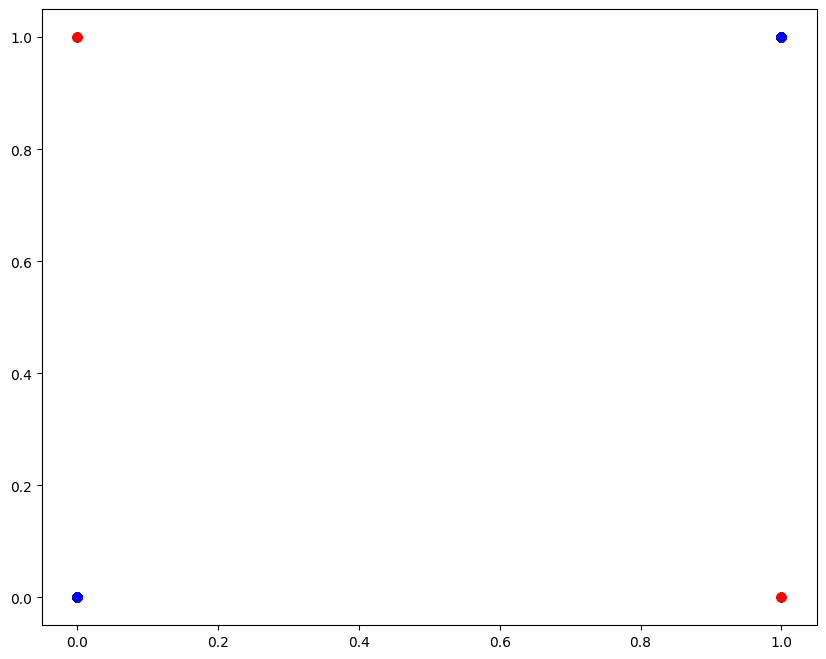

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=y_pred_LO,color="Red",label='Logistc')
plt.scatter(x=y_test,y=y_pred_DTC,color="Blue",label='Dession Tree Classifcation')
plt.xlabel='y_test'
plt.ylabel='y_Predict'
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
Grid_Prams={'max_iter':[30,40,50]}
GridModel=GridSearchCV(LogisticRegression(),Grid_Prams,cv=5)
GridModel.fit(x_train,y_train)
print(GridModel.best_params_)
print(GridModel.best_score_)

{'max_iter': 30}
0.61875


In [ ]:
Rand_Prams={'max_depth':[5,10,15,20,25,30]}
Rand_Model=RandomizedSearchCV(DecisionTreeClassifier(),Rand_Prams,cv=5)
Rand_Model.fit(x_train,y_train)
print(Rand_Model.best_params_)
print(Rand_Model.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'max_depth': 15}
1.0


In [ ]:
pip install gradio

In [ ]:
data.columns

Index(['Soil Type', 'Sunlight (hours/day)', 'Water Supply (liters/week)',
       'Temperature (Â°C)', 'pH Level', 'Plant Species', 'Thrives'],
      dtype='object')

In [ ]:
from math import e
import gradio as gr
def predict(Soil_Type, Sunlight, Water_Supply,Temperature,pH_Level, Plant_Species):
  try:
     inputdata=pd.DataFrame({
      'Soil Type':[Soil_Type],
      'Sunlight (hours/day)':[Sunlight],
      'Water Supply (liters/week)':[Water_Supply],
       'Temperature (Â°C)':[Temperature],
       'pH Level':[pH_Level],
       'Plant Species':[Plant_Species]
  })

     for col in encode:
       inputdata[col] = Le[col].transform(inputdata[col])
     inputdata[scale]=Sc.transform(inputdata[scale])
     result=DTC.predict(inputdata)
     if result[0] == 1 :
      return 'Yes'
     else:
      return 'No'
  except Exception as e:
    return str(e)

gr.Interface(
    fn=predict,
    title='Classifictaion',
    inputs=[
        gr.Dropdown(choices=['Clay','Sandy','Loamy'],label='PlantType'),
        gr.Number(label='Sunlight (hours/day)'),
        gr.Number(label='Water Supply (liters/week)'),
        gr.Number(label='Temperature (Â°C)'),
        gr.Number(label='pH Level'),
        gr.Dropdown(choices=['Lily','Fern','Cactus','Rose','Oak'],label='PlantSpecies')
    ], outputs=gr.Textbox(label='Prediction')
).launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://491d59642d82c48bb3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://491d59642d82c48bb3.gradio.live
